# Classify structured data

## Import TensorFlow and other libraries

In [3]:
import tensorflow as tf
import pandas as pd

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#read the data 

In [4]:
dataframe = pd.read_csv('data.csv')
dataframe.head()

,label,x1,x2
0,1,2.6487,4.5192
1,1,1.5438,2.4443
2,1,1.8990,4.2409
3,1,2.4711,5.8097
4,1,3.3590,6.4423


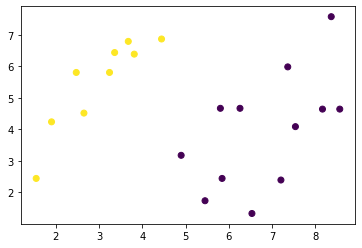

In [5]:
plt.scatter(dataframe.x1,dataframe.x2,c=dataframe.label)

In [ ]:
#prepare the data

In [6]:
#separate the features and labels

x_input=dataframe[['x1','x2']].values
y_label=dataframe[['label']].values
 

In [7]:
x=tf.Variable(x_input)
x=tf.cast(x,tf.float32)

In [8]:
y=tf.Variable(y_label)
y=tf.cast(y,tf.float32)

In [ ]:
#perceptron training 

In [9]:
#defining the parameters

In [10]:

Number_of_features=2
Number_of_units=1  

In [11]:
# weights and bias
weight=tf.Variable(tf.zeros([Number_of_features,Number_of_units]))  
bias=tf.Variable(tf.zeros([Number_of_units]))


In [12]:
#optimizer
optimizer=tf.optimizers.Adam(.01)


In [13]:
#perceptron definition
def perceptron(x):
    I=tf.add(tf.matmul(x,weight),bias)
    output=tf.sigmoid(I)
    return output

In [14]:
#training definition
def train(i):
    for n in range(i):
        loss=lambda: abs(tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=perceptron(x))))
        optimizer.minimize(loss,[weight,bias])

In [15]:
#Train the perceptron
train(100)

In [16]:
tf.print(weight,bias)

[[-0.62677449]
 [0.509044111]] [-0.094874762]


In [19]:
ypred=perceptron(x)

In [20]:
ypred=tf.round(ypred)

In [21]:
accuracy_score(y, ypred)

1.0

In [22]:
confusion_matrix(y, ypred)

array([[12,  0],
       [ 0,  9]], dtype=int64)

In [23]:
###The End